# Traffic

As we go on about our daily commutes in the morning and afternoon. the amount of traffic is a big factor that determines how much time we spend on traveling. Even if you are simply walking to school or work, the concurrent traffic will decide how long you need to wait at traffic lights. You might know that traffic congestion is a big problem in densely populated citys, for example, LA.
Also, traffic congestion increases vehicle emissions which degrades the air quality. Thus, I think low amount of traffic is a good indicator for the best neighborhoods in Pittsbugrh. I'll be using now be using the average daily car traffic count of a neighborhood to determine its traffic congestion level. 

In [3]:
import pandas as pd
import matplotlib.pyplot as plts

We only need the average daily car traffic and neighorhood columns from the orginal dataset.

In [4]:
df = pd.read_csv("TrafficCount.csv", usecols = ['average_daily_car_traffic', 'neighborhood',], dtype = {'neighborhood':'string', 'average_daily_car_traffic':'Float64'})
df.head(20)

,average_daily_car_traffic,neighborhood
0,4949.0,Polish Hill
1,<NA>,Central Lawrenceville
2,<NA>,Windgap
3,2741.0,Squirrel Hill South
4,<NA>,Perry North
5,1046.0,Central Northside
6,<NA>,Squirrel Hill North
7,3015.0,Polish Hill
8,<NA>,Central Oakland
9,<NA>,East Liberty


Drop the rows with null values

In [5]:
df_cleaned = df.dropna(subset=['average_daily_car_traffic'])
df_cleaned.head(20)

,average_daily_car_traffic,neighborhood
0,4949.0,Polish Hill
3,2741.0,Squirrel Hill South
5,1046.0,Central Northside
7,3015.0,Polish Hill
10,5592.0,Squirrel Hill South
13,1455.0,Bluff
14,11500.0,Crafton Heights
15,6793.0,Shadyside
17,7688.0,Highland Park
18,10350.0,North Shore


In [7]:
neighborhood_counts = df_cleaned['neighborhood'].value_counts()
print("How many times the average daily car traffic count is measured over a given peroid of days for a given neighborhood:")
print(neighborhood_counts)

How many times the average daily car traffic is measured over a given peroid of days for a given neighborhood:
Squirrel Hill South    26
Highland Park          15
Shadyside              15
Bloomfield             14
East Liberty           11
                       ..
Lincoln Place           1
Chartiers City          1
Spring Garden           1
Allegheny Center        1
West Oakland            1
Name: neighborhood, Length: 64, dtype: Int64


Drop the neighborhoods whose average daily car traffic count is only measured once since their results are likely to be biased. 

In [8]:
filtered_neighborhoods = neighborhood_counts[neighborhood_counts > 1].index
df_filtered = df_cleaned[df_cleaned['neighborhood'].isin(filtered_neighborhoods)]
df_filtered.head(20)

,average_daily_car_traffic,neighborhood
0,4949.0,Polish Hill
3,2741.0,Squirrel Hill South
5,1046.0,Central Northside
7,3015.0,Polish Hill
10,5592.0,Squirrel Hill South
13,1455.0,Bluff
15,6793.0,Shadyside
17,7688.0,Highland Park
19,9435.0,East Liberty
20,3860.0,Mount Washington


For each neighborhood, take the mean of of all its measured average daily car traffic counts.

In [9]:
df_mean = df_filtered.groupby('neighborhood')['average_daily_car_traffic'].mean().reset_index()
df_mean.head(20)

,neighborhood,average_daily_car_traffic
0,Arlington,2285.5
1,Beechview,1418.333333
2,Bloomfield,3078.642857
3,Bluff,1788.333333
4,Brighton Heights,2515.666667
5,Brookline,3914.4
6,California-Kirkbride,4975.333333
7,Carrick,1969.571429
8,Central Lawrenceville,2249.833333
9,Central Northside,1189.0


Sort the neighborhoods from lowest average daily car traffic to highest.

In [11]:
df_sorted_mean = df_mean.sort_values('average_daily_car_traffic', ascending=True)
df_sorted_mean.head(20)

,neighborhood,average_daily_car_traffic
41,Upper Hill,953.333333
9,Central Northside,1189.0
16,Hazelwood,1289.5
36,Spring Hill-City View,1293.0
13,Elliott,1342.666667
1,Beechview,1418.333333
43,Windgap,1531.0
17,Highland Park,1564.733333
22,Lower Lawrenceville,1736.0
3,Bluff,1788.333333


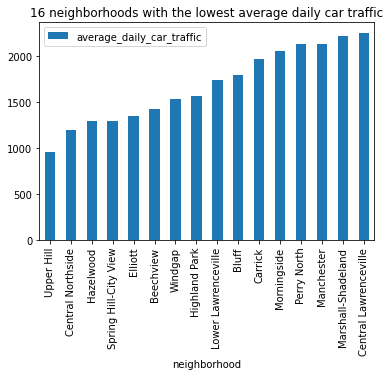

In [12]:
df_sorted_mean.head(16).plot(kind = 'bar', x = 'neighborhood', y = 'average_daily_car_traffic', title = "16 neighborhoods with the lowest average daily car traffic")

Since the average traffic of an area is dependent on its total population, we will be pulling an dataset which includes the estimated toal population of each neighborhood in Pittsburgh.

In [13]:
popcount = pd.read_csv("https://data.wprdc.org/dataset/5b18c198-474c-4723-b735-cc5220ad43cc/resource/82f29015-6905-4b1c-8300-afe9bb2231b3/download/total-population.csv",
                      usecols = [
                          'Neighborhood',
                          'Estimate; Total',
                      ], dtype = {
                          'Neighborhood': 'string',
                          'Estimate; Total': 'Float64',
                      })
popcount.head(10)

,Neighborhood,Estimate; Total
0,Allegheny Center,1411.0
1,Allegheny West,343.0
2,Allentown,2558.0
3,Arlington,1852.0
4,Arlington Heights,272.0
5,Banksville,3858.0
6,Bedford Dwellings,1349.0
7,Beechview,8078.0
8,Beltzhoover,1702.0
9,Bloomfield,8669.0


Add the estimated total population column to our dataframe.

In [68]:
combined_values = df_sorted_traffic_mean.merge(popcount, left_on='neighborhood', right_on='Neighborhood').set_index('Neighborhood')
combined_values.drop(columns=['neighborhood'], inplace=True)
combined_values.head(10)

,average_daily_car_traffic,Estimate; Total
Neighborhood,,
Upper Hill,953.333333,1884.0
Central Northside,1189.0,2892.0
Hazelwood,1289.5,4257.0
Spring Hill-City View,1293.0,2456.0
Elliott,1342.666667,2491.0
Beechview,1418.333333,8078.0
Windgap,1531.0,1534.0
Highland Park,1564.733333,6810.0
Lower Lawrenceville,1736.0,2572.0


Caculate the average daily car traffic per capita.

In [72]:
combined_values['average_traffic_per_capita'] = combined_values['average_daily_car_traffic'] / combined_values['Estimate; Total']
combined_values.head(10)

,average_daily_car_traffic,Estimate; Total,average_traffic_per_capita
Neighborhood,,,
Upper Hill,953.333333,1884.0,0.506016
Central Northside,1189.0,2892.0,0.411134
Hazelwood,1289.5,4257.0,0.302913
Spring Hill-City View,1293.0,2456.0,0.526466
Elliott,1342.666667,2491.0,0.539007
Beechview,1418.333333,8078.0,0.17558
Windgap,1531.0,1534.0,0.998044
Highland Park,1564.733333,6810.0,0.22977
Lower Lawrenceville,1736.0,2572.0,0.674961


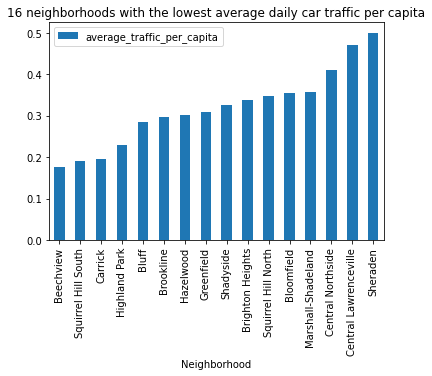

In [76]:
combined_values.sort_values('average_traffic_per_capita', ascending=True).head(16).plot(kind='bar', y = 'average_traffic_per_capita', title = "16 neighborhoods with the lowest average daily car traffic per capita")

We can see from the graph that Beechview is the neighborhood with the lowest average daily car traffic per capita. So we conclude that based on low traffic amount as the metric, Beechview is the best neighborhood.